In [7]:
# Notebook Cell 1: Import Required Libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [8]:
# Notebook Cell 2: Define the Wind Turbine Classes

# GeneralWindTurbine class: Implements a simplified wind turbine power curve function.
class GeneralWindTurbine:
    def __init__(self, rotor_diameter, hub_height, rated_power, v_in, v_rated, v_out, name=None):
        """
        Initialize the wind turbine with basic characteristics.
        
        Parameters:
        rotor_diameter (float): Rotor diameter in meters.
        hub_height (float): Hub height in meters.
        rated_power (float): Rated power in kW.
        v_in (float): Cut-in wind speed in m/s.
        v_rated (float): Rated wind speed in m/s.
        v_out (float): Cut-out wind speed in m/s.
        name (str, optional): Turbine name.
        """
        self.rotor_diameter = rotor_diameter
        self.hub_height = hub_height
        self.rated_power = rated_power
        self.v_in = v_in
        self.v_rated = v_rated
        self.v_out = v_out
        self.name = name

    def get_power(self, v):
        """
        Compute the power output at wind speed v using a simplified model.
        
        Parameters:
        v (float): Wind speed in m/s.
        
        Returns:
        float: Power output in kW.
        """
        if v < self.v_in or v > self.v_out:
            return 0.0
        elif self.v_in <= v < self.v_rated:
            return self.rated_power * (v / self.v_rated) ** 3
        elif self.v_rated <= v <= self.v_out:
            return self.rated_power

# WindTurbine class: Inherits from GeneralWindTurbine and uses an empirical power curve for interpolation.
class WindTurbine(GeneralWindTurbine):
    def __init__(self, rotor_diameter, hub_height, rated_power, v_in, v_rated, v_out,
                 power_curve_data, name=None):
        """
        Initialize the wind turbine with a detailed power curve.
        
        Parameters:
        rotor_diameter (float): Rotor diameter in meters.
        hub_height (float): Hub height in meters.
        rated_power (float): Rated power in kW.
        v_in (float): Cut-in wind speed in m/s.
        v_rated (float): Rated wind speed in m/s.
        v_out (float): Cut-out wind speed in m/s.
        power_curve_data (numpy.ndarray): A n x 2 array with wind speeds (m/s) and power (kW).
        name (str, optional): Turbine name.
        """
        super().__init__(rotor_diameter, hub_height, rated_power, v_in, v_rated, v_out, name=name)
        self.power_curve_data = np.array(power_curve_data)

    def get_power(self, v):
        """
        Return power output by interpolating the empirical power curve data.
        
        Parameters:
        v (float): Wind speed in m/s.
        
        Returns:
        float: Interpolated power output in kW.
        """
        wind_speeds = self.power_curve_data[:, 0]
        power_values = self.power_curve_data[:, 1]
        return np.interp(v, wind_speeds, power_values)


In [9]:
# Notebook Cell 3: Load Empirical Power Curve Data from CSV

# The raw CSV URL from the GitHub repository for LEANWIND_Reference_8MW_164
csv_url = "https://raw.githubusercontent.com/NREL/turbine-models/main/turbine_models/data/Offshore/LEANWIND_Reference_8MW_164.csv"

# Use Pandas to read the CSV data; we extract the first two columns (Wind Speed and Power)
df = pd.read_csv(csv_url)
power_curve_data = df.iloc[:, :2].values

# Optionally, display the first few rows to verify the data
print(df.head())


   Wind Speed [m/s]  Power [kW]  Cp [-]  Thrust [kN]  Ct [-]
0               4.0         110    0.13          190    0.92
1               4.5         350    0.30          232    0.88
2               5.0         600    0.37          273    0.85
3               5.5         850    0.39          324    0.83
4               6.0        1140    0.41          381    0.82


In [10]:
# Notebook Cell 4: Set Turbine Parameters from Metadata

# Parameters are taken from:
# https://nrel.github.io/turbine-models/LEANWIND_8MW_164_RWT.html
rotor_diameter = 164   # meters
hub_height = 110       # meters
rated_power = 8000     # kW
v_in = 4.0             # cut-in wind speed in m/s
v_rated = 12.5         # rated wind speed in m/s
v_out = 25.0           # cut-out wind speed in m/s


In [11]:
# Notebook Cell 5: Create the Wind Turbine Objects

# General turbine using the simplified analytical model
general_turbine = GeneralWindTurbine(rotor_diameter, hub_height, rated_power, v_in, v_rated, v_out,
                                       name="LEANWIND_8MW_164_RWT_General")

# Detailed turbine using the empirical power curve data for interpolation
detailed_turbine = WindTurbine(rotor_diameter, hub_height, rated_power, v_in, v_rated, v_out,
                               power_curve_data, name="LEANWIND_8MW_164_RWT_Detailed")


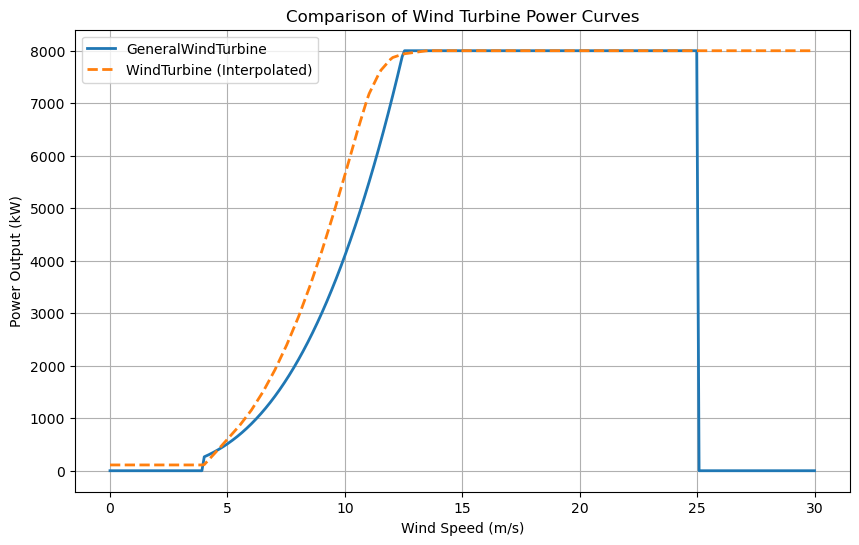

In [12]:
# Notebook Cell 6: Plot and Compare the Power Curves

# Define an array of wind speeds from 0 to 30 m/s for the comparison
wind_speeds = np.linspace(0, 30, 300)

# Compute power outputs for each wind speed using both turbine models
power_general = np.array([general_turbine.get_power(v) for v in wind_speeds])
power_detailed = np.array([detailed_turbine.get_power(v) for v in wind_speeds])

# Plot the power curves
plt.figure(figsize=(10, 6))
plt.plot(wind_speeds, power_general, label="GeneralWindTurbine", lw=2)
plt.plot(wind_speeds, power_detailed, label="WindTurbine (Interpolated)", lw=2, linestyle='--')
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Power Output (kW)")
plt.title("Comparison of Wind Turbine Power Curves")
plt.legend()
plt.grid(True)
plt.show()
